In [1]:
# Import the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data_train=pd.read_csv('NSE-TATAGLOBAL.csv')

In [3]:
data_train

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [4]:
data_train.shape

(2035, 8)

In [5]:
# sequential data
training_set=data_train.iloc[:,1:2].values

In [6]:
training_set # open 

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

In [7]:
# Data Preprocessing
# scale data in 0-1
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [8]:
training_set_scaled

array([[0.6202352 ],
       [0.62226277],
       [0.64436334],
       ...,
       [0.16504461],
       [0.15896188],
       [0.16626115]])

In [9]:
training_set_scaled[60]

array([0.77007299])

Split the dataset- random seed, cv not work

To prepare data LSTM ---- Prepare data in sequence--- complete data will not be passed to LSTM

Prepare Timestamp=3 
8 observation- total (6,3,1)- 3-D Data first dimention total data, second dim- time stamp, third dim number of units in one input sequence
0    1    2  3
120 130 125 140 150 160 190 150   
  X_train    y_train
120 130 125  140
130 125 140  150
125 140 150  160

Requirement-
Time stamp-60

In [10]:
# Data Prepare
X_train=[]
y_train=[]
for i in range(60,2035):
    X_train.append(training_set_scaled[i-60:i,0]) # 0 to 60 ---0-59,1-61
    y_train.append(training_set_scaled[i,0]) # 60,61
X_train,y_train=np.array(X_train),np.array(y_train)  

In [11]:
X_train.shape

(1975, 60)

In [12]:
X_train

array([[0.6202352 , 0.62226277, 0.64436334, ..., 0.79622871, 0.81062449,
        0.74371452],
       [0.62226277, 0.64436334, 0.61719384, ..., 0.81062449, 0.74371452,
        0.77007299],
       [0.64436334, 0.61719384, 0.61820762, ..., 0.74371452, 0.77007299,
        0.73641525],
       ...,
       [0.19870235, 0.21796431, 0.21553122, ..., 0.14963504, 0.14801298,
        0.15815085],
       [0.21796431, 0.21553122, 0.20600162, ..., 0.14801298, 0.15815085,
        0.16504461],
       [0.21553122, 0.20600162, 0.21654501, ..., 0.15815085, 0.16504461,
        0.15896188]])

In [13]:
y_train

array([0.77007299, 0.73641525, 0.73763179, ..., 0.16504461, 0.15896188,
       0.16626115])

In [14]:
y_train.shape

(1975,)

In [15]:
# LSTM require always 3-D data
#Reshape
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [16]:
X_train.shape

# First dimention - Number of samples, timestamp, number of columns

(1975, 60, 1)

In [17]:
#Build the LSTM
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [18]:
model=Sequential()
# Add first LSTM Layer
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

# Add second LSTM Layer
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

# Add third LSTM Layer
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

# Add fourth LSTM Layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units=1))


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [20]:
print(np.__version__)

1.21.5


In [21]:
# Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [22]:
# Run the model
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
62/62 [==============================] - 18s 190ms/step - loss: 0.0102
Epoch 2/10
62/62 [==============================] - 12s 186ms/step - loss: 0.0034
Epoch 3/10
62/62 [==============================] - 12s 187ms/step - loss: 0.0027
Epoch 4/10
62/62 [==============================] - 12s 188ms/step - loss: 0.0023
Epoch 5/10
62/62 [==============================] - 12s 190ms/step - loss: 0.0022
Epoch 6/10
62/62 [==============================] - 12s 193ms/step - loss: 0.0024
Epoch 7/10
62/62 [==============================] - 12s 188ms/step - loss: 0.0025
Epoch 8/10
62/62 [==============================] - 12s 188ms/step - loss: 0.0023
Epoch 9/10
62/62 [==============================] - 12s 189ms/step - loss: 0.0018
Epoch 10/10
62/62 [==============================] - 12s 189ms/step - loss: 0.0018


In [23]:
# Make the prediction and visualize the results
dataset_test=pd.read_csv('tatatest.csv')

In [24]:
dataset_test.shape

(16, 8)

In [25]:
dataset_test

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-24,220.10,221.25,217.05,219.55,219.80,2171956,4771.34
1,2018-10-23,221.10,222.20,214.75,219.55,218.30,1416279,3092.15
2,2018-10-22,229.45,231.60,222.00,223.05,223.25,3529711,8028.37
3,2018-10-19,230.30,232.70,225.50,227.75,227.20,1527904,3490.78
4,2018-10-17,237.70,240.80,229.45,231.30,231.10,2945914,6961.65
5,2018-10-16,237.10,237.70,233.05,234.40,235.45,1723113,4052.25
6,2018-10-15,229.70,237.00,226.80,234.80,234.90,1224339,2845.68
7,2018-10-12,226.25,232.35,225.50,228.70,229.10,1165527,2675.91
8,2018-10-11,215.00,229.70,215.00,225.60,224.60,1293881,2890.85
9,2018-10-10,215.00,229.65,215.00,228.25,228.40,2919278,6557.95


In [26]:
test_set=dataset_test.iloc[:,1:2].values

In [27]:
test_set

array([[220.1 ],
       [221.1 ],
       [229.45],
       [230.3 ],
       [237.7 ],
       [237.1 ],
       [229.7 ],
       [226.25],
       [215.  ],
       [215.  ],
       [215.5 ],
       [208.  ],
       [217.  ],
       [223.5 ],
       [230.  ],
       [234.55]])

In [28]:
# Concat /merge the training & test data
dataset_total=pd.concat((data_train['Open'],dataset_test['Open']),axis=0)

In [29]:
dataset_total.shape

(2051,)

In [30]:
dataset_total

0     234.05
1     234.55
2     240.00
3     233.30
4     233.55
       ...  
11    208.00
12    217.00
13    223.50
14    230.00
15    234.55
Name: Open, Length: 2051, dtype: float64

In [31]:
# ready the data
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values #1975 ---2051 =76
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):  
    X_test.append(inputs[i-60:i, 0]) # 76
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [32]:
X_test.shape

(16, 60, 1)

In [33]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [34]:
predicted_stock_price

array([[115.39179 ],
       [116.747375],
       [119.7318  ],
       [124.99012 ],
       [132.79163 ],
       [143.0581  ],
       [155.3551  ],
       [168.91322 ],
       [182.80643 ],
       [196.04279 ],
       [207.81772 ],
       [217.61714 ],
       [225.14137 ],
       [230.42801 ],
       [233.77245 ],
       [235.62932 ]], dtype=float32)

In [35]:
test_set

array([[220.1 ],
       [221.1 ],
       [229.45],
       [230.3 ],
       [237.7 ],
       [237.1 ],
       [229.7 ],
       [226.25],
       [215.  ],
       [215.  ],
       [215.5 ],
       [208.  ],
       [217.  ],
       [223.5 ],
       [230.  ],
       [234.55]])

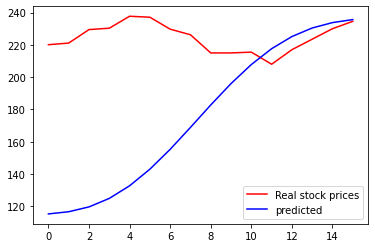

In [36]:
# Visualize the result
plt.plot(test_set,label='Real stock prices',color='red')
plt.plot(predicted_stock_price,color='blue',label='predicted')
plt.legend()
plt.show()